In [1]:
# deciles (total returns) and size_sorts (total returns) momentum (excess returns) factors (excess returns)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/steph/OneDrive/Documents/School/uchicago coursework/portfolio management/finm-portfolio-2024')
sys.path.append('C:/Users/steph/OneDrive/Documents/School/uchicago coursework/portfolio management/finm-portfolio-2024/data')
import os

from pathlib import Path
sys.path.append(str(Path().resolve().parent))

import cmds.portfolio_management_helper as pmh
import cmds.portfolio as port
from datetime import datetime
from scipy.stats import norm

ff = pd.read_excel('../data/momentum_data.xlsx', sheet_name='momentum (excess returns)').set_index('Date')
factors = pd.read_excel('../data/momentum_data.xlsx', sheet_name='factors (excess returns)').set_index('Date')
deciles = pd.read_excel('../data/momentum_data.xlsx', sheet_name='deciles (total returns)').set_index('Date')
size_sorts = pd.read_excel('../data/momentum_data.xlsx', sheet_name='size_sorts (total returns)').set_index('Date')
rf = pd.read_excel('../data/momentum_data.xlsx', sheet_name='risk-free rate').set_index('Date')


In [2]:
annual_factor = 12
full_data = pd.merge(ff, factors, on= 'Date')
timeframes={'1927-2024': ['1927-01-31', None],
            '1927-1993': ['1927-01-31','1993-12-31'],
            '1994-2008': ['1994-01-31','2008-12-31'],
            '2009-2024': ['2009-01-31', None]}

full_sample = pmh.calc_summary_statistics(full_data, correlations=['MKT', 'HML'], keep_columns=['Mean', 'Vol', 'Sharpe', 'Skewness', 'Correlation'], timeframes=timeframes, keep_indexes='UMD', annual_factor = annual_factor)
full_sample

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Mean,Annualized Mean,Vol,Annualized Vol,Sharpe,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD 1927-2024,0.0063,0.0753,0.0469,0.1625,0.1338,0.4635,-2.9905,-0.3443,-0.4064
UMD 1927-1993,0.0075,0.0901,0.0462,0.1600,0.1625,0.5630,-3.8082,-0.3625,-0.4950
UMD 1994-2008,0.0087,0.1044,0.0507,0.1756,0.1716,0.5945,-0.5820,-0.2345,-0.1294
UMD 2009-2024,-0.0013,-0.0151,0.0457,0.1585,-0.0275,-0.0952,-2.6910,-0.3676,-0.3209


In [3]:
full_data

,UMD,MKT,SMB,HML
Date,,,,
1927-01-31,0.0036,-0.0006,-0.0037,0.0454
1927-02-28,-0.0214,0.0418,0.0004,0.0294
1927-03-31,0.0361,0.0013,-0.0165,-0.0261
1927-04-30,0.0430,0.0046,0.0030,0.0081
1927-05-31,0.0300,0.0544,0.0153,0.0473
...,...,...,...,...
2024-05-31,-0.0002,0.0434,0.0078,-0.0166
2024-06-30,0.0090,0.0277,-0.0306,-0.0331
2024-07-31,-0.0242,0.0124,0.0680,0.0573


Since 2008, momentum has achieved negative returns, where prior to 2008, the returns were consistently positive. Vol seems similar, and so does the correlation of momentum to the market and value (HML), but mean returns have been negative.

Momentum could still be a valuable component to a portfolio, though recent performance makes me not confident in the ability to estimate mean returns from momentum. It does have negative correlations to the MKT and HML, with typical absolute correlations < 50% to both the MKT and HML factors, which shows that momentum could be a solid diversifying asset.

### 2.2

In [13]:
# Construct the data
timeframes = {'1994-2024': ['1994-01-31',None]}
full_data['Long Only'] = 0.5 * (size_sorts['BIG HiPRIOR']+size_sorts['SMALL HiPRIOR']) - rf['RF']
full_sample = pmh.calc_summary_statistics(full_data, correlations=['MKT', 'HML'], 
                                          keep_columns=['Mean', 'Vol', 'Sharpe', 'Skewness', 'Correlation'], 
                                          timeframes=timeframes, keep_indexes=['Long Only', 'UMD'])
full_sample

Assuming monthly returns with annualization term of 12
Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Mean,Annualized Mean,Vol,Annualized Vol,Sharpe,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD 1994-2024,0.0036,0.0432,0.0484,0.1677,0.0743,0.2575,-1.4460,-0.3062,-0.2152
Long Only 1994-2024,0.0098,0.1172,0.0515,0.1784,0.1896,0.6569,-0.4448,0.9036,-0.1190


#### B

In terms of Mean, Vol and Sharpe, Long Only momentum is very attractive, compared to long-short momentum.

#### C
Long only momentum is 90%+ correlated to the market, through it keeps low correlation to value. This makes it not as attractive for diversification.

#### D


[]

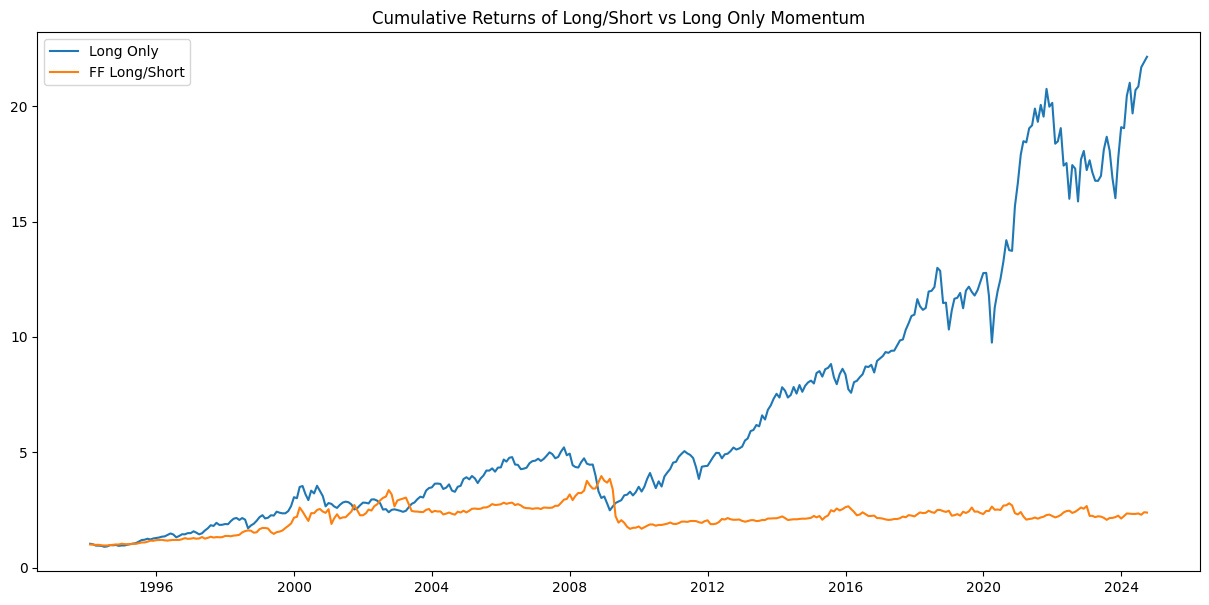

In [14]:
plt.figure(figsize=(15,7))
plt.plot(full_data.loc['1994-01-31':].index, (full_data.loc['1994-01-31':, 'Long Only']+ 1).cumprod(), label= 'Long Only')
plt.plot(full_data.loc['1994-01-31':].index, (full_data.loc['1994-01-31':, 'UMD']+ 1).cumprod(), label= 'FF Long/Short')
plt.title('Cumulative Returns of Long/Short vs Long Only Momentum')
plt.legend()
plt.plot()

In [15]:
data_1994_on = full_data.loc['1994-01-31':]
deciles_1994_on = deciles.loc['1994-01-31':]
data_1994_on['momD1'] = deciles_1994_on['Hi PRIOR'] - deciles_1994_on['Lo PRIOR']
data_1994_on['momD3'] = (1/3* (deciles_1994_on['PRIOR 8']+ deciles_1994_on['PRIOR 9'] + deciles_1994_on['Hi PRIOR']) - 
                         1/3 * (deciles_1994_on['Lo PRIOR']+ deciles_1994_on['PRIOR 2'] + deciles_1994_on['PRIOR 3']))
data_1994_on['momD5']= (1/5* (deciles_1994_on['PRIOR 6'] + deciles_1994_on['PRIOR 7']+ deciles_1994_on['PRIOR 8']+ deciles_1994_on['PRIOR 9'] + deciles_1994_on['Hi PRIOR']) - 
                         1/5 * (deciles_1994_on['Lo PRIOR']+ deciles_1994_on['PRIOR 2'] + deciles_1994_on['PRIOR 3']+ deciles_1994_on['PRIOR 4'] + deciles_1994_on['PRIOR 5']))

pmh.calc_summary_statistics(data_1994_on, correlations=['MKT', 'HML'], 
                                            keep_columns=['Mean', 'Vol', 'Sharpe', 'Skewness', 'Correlation'],
                                            keep_indexes=['momD1','momD3', 'momD5'])

Assuming monthly returns with annualization term of 12
Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Mean,Annualized Mean,Vol,Annualized Vol,Sharpe,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
momD1,0.0068,0.0820,0.0863,0.2990,0.0792,0.2742,-1.3046,-0.3197,-0.2335
momD3,0.0024,0.0286,0.0558,0.1934,0.0426,0.1476,-1.3450,-0.3617,-0.2115
momD5,0.0014,0.0164,0.0387,0.1340,0.0354,0.1225,-1.4159,-0.3486,-0.2122


In [18]:
size_sorts.columns

Index(['SMALL LoPRIOR', 'ME1 PRIOR2', 'SMALL HiPRIOR', 'BIG LoPRIOR',
       'ME2 PRIOR2', 'BIG HiPRIOR'],
      dtype='object')

In [19]:
size_sorts_1994_on = size_sorts.loc['1994-01-31':]
data_1994_on['Small Stocks'] = size_sorts_1994_on['SMALL HiPRIOR']- size_sorts_1994_on['SMALL LoPRIOR']
data_1994_on['Big Stocks'] = size_sorts_1994_on['BIG HiPRIOR'] - size_sorts_1994_on['BIG LoPRIOR']
pmh.calc_summary_statistics(data_1994_on, correlations=['MKT', 'HML'], 
                                            keep_columns=['Mean', 'Vol', 'Sharpe', 'Skewness', 'Correlation'],
                                            keep_indexes=['UMD','Big Stocks', 'Small Stocks'])

Assuming monthly returns with annualization term of 12
Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Mean,Annualized Mean,Vol,Annualized Vol,Sharpe,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD,0.0036,0.0432,0.0484,0.1677,0.0743,0.2575,-1.4460,-0.3062,-0.2152
Small Stocks,0.0053,0.0632,0.0490,0.1696,0.1076,0.3726,-1.7636,-0.3040,-0.1485
Big Stocks,0.0019,0.0232,0.0527,0.1825,0.0367,0.1270,-0.8791,-0.2802,-0.2575


In [20]:
barnstable = pd.read_excel('../data/barnstable_analysis_data.xlsx', sheet_name='data').set_index("date")
barnstable.fillna(method='ffill', inplace=True)

In [21]:
barnstable

,SPX,TB1M
date,,
1926-01-30,-0.0018,0.0031
1926-02-27,-0.0333,0.0026
1926-03-31,-0.0577,0.0026
1926-04-30,0.0385,0.0023
1926-05-28,0.0136,0.0027
...,...,...
2024-05-31,0.0494,0.0045
2024-06-28,0.0372,0.0045
2024-07-31,0.0121,0.0045


In [23]:
barnstable['MKT-rf'] = barnstable['SPX']-barnstable['TB1M']
for column in barnstable.columns:
    barnstable[f'{column}_log'] = np.log(1+ barnstable[column])

In [24]:

periods = {'1965-1999': ['1965-01-31', '1999-12-31'],
           '2000-2024': ['2000-01-31', None],
           '1926-2024': ['1924-01-31', None]}
barnstable_table = pmh.calc_summary_statistics(barnstable, timeframes=periods, keep_columns=['Mean', 'Vol'])
barnstable_table.reset_index(inplace=True)
barnstable_table[['Asset', 'Date Range']] = barnstable_table['index'].str.split(pat = ' ', n= 1, expand=True)
barnstable_table.drop(columns = ['index', 'Mean', 'Vol'], inplace=True)
barnstable_pivot = barnstable_table.pivot(index ='Asset', columns = 'Date Range', values=['Annualized Mean', 'Annualized Vol'])
barnstable_pivot.columns = barnstable_pivot.columns.swaplevel(0, 1)
barnstable_pivot = barnstable_pivot.sort_index(axis = 1, level =  0)
barnstable_pivot['log'] = ['log' if '_log' in x else 'levels' for x in barnstable_pivot.index]
barnstable_pivot.reset_index(inplace=True)
barnstable_pivot.set_index(['log', 'Asset'], inplace=True)
barnstable_pivot.sort_index()

Assuming monthly returns with annualization term of 12
Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


Date Range              1926-2024                      1965-1999  \
                  Annualized Mean Annualized Vol Annualized Mean   
log    Asset                                                       
levels MKT-rf              0.0838         0.1871          0.0671   
       SPX                 0.1155         0.1868          0.1287   
       TB1M                0.0317         0.0085          0.0615   
log    MKT-rf_log          0.0662         0.1866          0.0556   
       SPX_log             0.0978         0.1861          0.1169   
       TB1M_log            0.0317         0.0085          0.0614   

Date Range                             2000-2024                 
                  Annualized Vol Annualized Mean Annualized Vol  
log    Asset                                                     
levels MKT-rf             0.1502          0.0701         0.1533  
       SPX                0.1495          0.0873         0.1531  
       TB1M               0.0072          0.0172         0.0055  
log    MKT-rf_log         0.1512          0.0581         0.1545  
       SPX_log            0.1497          0.0753         0.1540  
       TB1M_log           0.0071          0.0172         0.0055

In [25]:
barnstable.shape

(1185, 6)